# Stacked Bar Plots for ASV data:

**Updated on:** 2023-03-07 18:06 CET

In this Jupyter Notebook we use the ASV tables (16S, 18SV9) obtained for CCE data to get stacked bar plot in different taxonomic level.

**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
**Input file format**: .csv files <br>
**Outputs**: .csv files, .svg images  <br>
**Dependencies**: tidyverse, dplyr

---

# 1. Setting working directory and loading libraries:

In [1]:
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("highcharter")) install.packages("highcharter")

Loading required package: tidyverse

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.1     v tibble    3.1.8
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: highcharter

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
#loading libraries
library(tidyverse)
library(highcharter)

In [3]:
setwd("G:/My Drive/CCE DATA/P1706_ASV") #setting working directory

In [4]:
print(list.files(".")) #lists all the files in the folder

 [1] "16S_ASV_table.csv"                   
 [2] "16S_ASV_taxonomy.csv"                
 [3] "18SV9_ASV_table.csv"                 
 [4] "18SV9_ASV_taxonomy.csv"              
 [5] "ASV_16S_With_Metadata.csv"           
 [6] "ASV18SV9_With_Metadata.csv"          
 [7] "desktop.ini"                         
 [8] "metadata_CCE_updatedRRT.csv"         
 [9] "outputs_from_ASV_raw_data_processing"
[10] "P1706_ASV.Rmd"                       
[11] "sample_ID_index.csv"                 
[12] "Stacked_Plots_and_Sunbursts"         


# 2. Load input files

In [6]:
# asv 16s data --> "ASV_16S_With_Metadata.csv"; 
# asv18s data --> "ASV18SV9_With_Metadata.csv"

In [58]:
ft <- read.csv("ASV18SV9_With_Metadata.csv",check.names = F,header = T,row.names = 1)

In [59]:
head(ft)
dim(ft)

,Feature.ID,CCE_P1706_39.mzxml,CCE_P1706_41.mzxml,CCE_P1706_43.mzxml,CCE_P1706_45.mzxml,CCE_P1706_47.mzxml,CCE_P1706_49.mzxml,CCE_P1706_51.mzxml,CCE_P1706_53.mzxml,CCE_P1706_55.mzxml,...,Domain18SV9,Kingdom18SV9,Phylum18SV9,Class18SV9,Order18SV9,Family18SV9,Genus18SV9,Species18SV9,Confidence,shared name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,000167ce642266c21c62843e4a010266,0,0,0,0,0,0,0,0,0,...,Eukaryota,Rhizaria,Radiolaria,Acantharea,Acantharea_X,Acantharea_XX,Acantharea_XXX,Acantharea_XXX_sp.,0.9991760,Eukaryota;Rhizaria;Radiolaria;Acantharea;Acantharea_X;Acantharea_XX;Acantharea_XXX;Acantharea_XXX_sp.;
2,001567b7cb76eecd73f31a288fcfcb69,0,0,0,2,0,0,0,0,0,...,Eukaryota,Stramenopiles,NA,NA,NA,NA,NA,NA,0.7359983,Eukaryota;Stramenopiles
3,0018f741aa09de859e5af52f19a2b7c1,0,0,0,0,0,0,0,0,0,...,Eukaryota,NA,NA,NA,NA,NA,NA,NA,1.0000000,Eukaryota
4,00236daa14e0b5a92c512b565be61b51,0,0,0,0,0,0,0,0,0,...,Eukaryota,Archaeplastida,Chlorophyta,Chlorophyceae,NA,NA,NA,NA,0.8520327,Eukaryota;Archaeplastida;Chlorophyta;Chlorophyceae
5,003695728276f773ed0c54ca361198e2,0,0,0,0,0,0,0,0,0,...,Eukaryota,NA,NA,NA,NA,NA,NA,NA,1.0000000,Eukaryota
6,0038284216ef9b1f951a5f4e5d4a3aea,0,0,0,0,0,0,0,0,0,...,Eukaryota,Archaeplastida,Chlorophyta,Pyramimonadales,Pyramimonadales_X,Pyramimonadales_XX,Halosphaera,Halosphaera_sp.,0.9981855,Eukaryota;Archaeplastida;Chlorophyta;Pyramimonadales;Pyramimonadales_X;Pyramimonadales_XX;Halosphaera;Halosphaera_sp.;


[1] 10319   153

In [60]:
tail(ft) #shows the last 6 rows.

,Feature.ID,CCE_P1706_39.mzxml,CCE_P1706_41.mzxml,CCE_P1706_43.mzxml,CCE_P1706_45.mzxml,CCE_P1706_47.mzxml,CCE_P1706_49.mzxml,CCE_P1706_51.mzxml,CCE_P1706_53.mzxml,CCE_P1706_55.mzxml,...,Domain18SV9,Kingdom18SV9,Phylum18SV9,Class18SV9,Order18SV9,Family18SV9,Genus18SV9,Species18SV9,Confidence,shared name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
10314,ATTRIBUTE_NH4_binned,0.1,0.5,1.6,2.1,0.3,0.3,0.0,0.2,2.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10315,ATTRIBUTE_DOC,48.4,52.2,50.9,53.1,56.0,59.0,47.7,49.1,52.4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10316,ATTRIBUTE_Si_excess,0.000000000,-0.705727417,-0.046956336,-0.958424775,-1.558768707,0.437496915,-0.054574593,-0.120616991,-0.231795286,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10317,ATTRIBUTE_C_N_Molar,6.31,6.75,7.20,6.62,5.99,5.87,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10318,ATTRIBUTE_BCP_ugC_L_d,0.21906582,0.26802295,0.83291603,1.02573589,6.12707258,9.05626003,0.21713387,0.41707406,1.10701322,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10319,ATTRIBUTE_Primary_Production_ug_L_day,NA,1.025041e-03,8.360442e-02,1.288131e+00,1.396762e+02,NA,NA,4.861640e-04,2.495319e-02,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [61]:
rownames(ft) <- ft[,1] #naming the 1st column 'Feature.ID' as the row names
ft <- ft[,-c(1,ncol(ft))] #removing the 1st column 'Feature.ID' and the last column 'shared name'
colnames(ft) <- gsub('18SV9','',colnames(ft)) #remove the 18S extension from the column names

head(ft,3)

## Filter asv_18s according to different depth ranges:

In [63]:
ft_t <- data.frame(t(ft))
head(ft_t,3)

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned,ATTRIBUTE_DOC,ATTRIBUTE_Si_excess,ATTRIBUTE_C_N_Molar,ATTRIBUTE_BCP_ugC_L_d,ATTRIBUTE_Primary_Production_ug_L_day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCE_P1706_39.mzxml,0,0,0,0,0,0,23,0,0,0,...,0.064,1.9,0.2,25,0.1,48.4,0.000000000,6.31,0.21906582,NA
CCE_P1706_41.mzxml,0,0,0,0,0,0,0,0,0,0,...,0.456,1.9,0.5,24,0.5,52.2,-0.705727417,6.75,0.26802295,1.025041e-03
CCE_P1706_43.mzxml,0,0,0,0,0,0,0,0,0,0,...,1.618,1.8,0.6,20,1.6,50.9,-0.046956336,7.20,0.83291603,8.360442e-02


In [64]:
tail(ft_t,3)
dim(ft_t)

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned,ATTRIBUTE_DOC,ATTRIBUTE_Si_excess,ATTRIBUTE_C_N_Molar,ATTRIBUTE_BCP_ugC_L_d,ATTRIBUTE_Primary_Production_ug_L_day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Genus,Acantharea_XXX,NA,NA,NA,NA,Halosphaera,MAST-3I_XX,NA,NA,Dino-Group-II_XX,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Species,Acantharea_XXX_sp.,NA,NA,NA,NA,Halosphaera_sp.,MAST-3I_XX_sp.,NA,NA,Dino-Group-II_XX_sp.,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Confidence,0.9991760,0.7359983,1.0000000,0.8520327,1.0000000,0.9981855,0.9999837,0.9816955,1.0000000,0.9920889,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1]   151 10319

According to dim(ft_t), we have 151 rows and 10319 columns. 

In [65]:
attribute_columns <- colnames(ft_t)[grepl("ATTRIBUTE", colnames(ft_t))] #listing all the attribute columns in our ft

length(attribute_columns)
attribute_columns

[1] 37

[1] "ATTRIBUTE_x"                          
 [2] "ATTRIBUTE_y"                          
 [3] "ATTRIBUTE_z"                          
 [4] "ATTRIBUTE_Spot_size"                  
 [5] "ATTRIBUTE_Filament_Possition"         
 [6] "ATTRIBUTE_Sample_Number"              
 [7] "ATTRIBUTE_Date"                       
 [8] "ATTRIBUTE_Cast"                       
 [9] "ATTRIBUTE_Event_Number"               
[10] "ATTRIBUTE_Bottle"                     
[11] "ATTRIBUTE_Depth"                      
[12] "ATTRIBUTE_Depth_Range"                
[13] "ATTRIBUTE_Location"                   
[14] "ATTRIBUTE_Sampling_Type"              
[15] "ATTRIBUTE_Sample_Type"                
[16] "ATTRIBUTE_Chlorophyll_a__ug_l_"       
[17] "ATTRIBUTE_Chlorophyll_binned"         
[18] "ATTRIBUTE_Phaeopigment__ug_l_"        
[19] "ATTRIBUTE_Temperature__C_"            
[20] "ATTRIBUTE_Temperature_binned"         
[21] "ATTRIBUTE_Fluorescence__V_"           
[22] "ATTRIBUTE_Transmission__per_"         
[23] "ATTRIBUTE_O2_Saturation__per_"        
[24] "ATTRIBUTE_O2_saturation_binned"       
[25] "ATTRIBUTE_PO4"                        
[26] "ATTRIBUTE_NO2"                        
[27] "ATTRIBUTE_NO3"                        
[28] "ATTRIBUTE_NH4"                        
[29] "ATTRIBUTE_PO4_binned"                 
[30] "ATTRIBUTE_NO2_binned"                 
[31] "ATTRIBUTE_NO3_binned"                 
[32] "ATTRIBUTE_NH4_binned"                 
[33] "ATTRIBUTE_DOC"                        
[34] "ATTRIBUTE_Si_excess"                  
[35] "ATTRIBUTE_C_N_Molar"                  
[36] "ATTRIBUTE_BCP_ugC_L_d"                
[37] "ATTRIBUTE_Primary_Production_ug_L_day"

Here, there are 37 attribute columns. We are interested in only 4 metadata columns: ATTRIBUTE_Filament_Possition, ATTRIBUTE_Depth, ATTRIBUTE_Depth_Range, ATTRIBUTE_Location.

In [66]:
Interested_columns <- c("ATTRIBUTE_Filament_Possition", "ATTRIBUTE_Depth", "ATTRIBUTE_Depth_Range", "ATTRIBUTE_Location")

#removing these interested attribute columns from 'attribute_columns'
not_interested_attributes <- attribute_columns[!attribute_columns %in% Interested_columns] 

# deselect these not_interested_attributes from out ft
ft_t <- ft_t %>% select(!all_of(not_interested_attributes))

head(ft_t,3)
dim(ft_t)

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCE_P1706_39.mzxml,0,0,0,0,0,0,23,0,0,0,...,0,0,0,0,0,0,Cycle_1,100,70-150,Cycle_1_day1
CCE_P1706_41.mzxml,0,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,Cycle_1,75,70-150,Cycle_1_day1
CCE_P1706_43.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,50,40-60,Cycle_1_day1


[1]   151 10286

In [67]:
tail(ft_t,3)

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Genus,Acantharea_XXX,NA,NA,NA,NA,Halosphaera,MAST-3I_XX,NA,NA,Dino-Group-II_XX,...,OLIGO5_XX,PLO,NA,Diplonema,NA,Diplonemea_XX,NA,NA,NA,NA
Species,Acantharea_XXX_sp.,NA,NA,NA,NA,Halosphaera_sp.,MAST-3I_XX_sp.,NA,NA,Dino-Group-II_XX_sp.,...,OLIGO5_XX_sp.,PLO_of,NA,NA,NA,Diplonemea_XX_sp.,NA,NA,NA,NA
Confidence,0.9991760,0.7359983,1.0000000,0.8520327,1.0000000,0.9981855,0.9999837,0.9816955,1.0000000,0.9920889,...,0.9955419,0.9970035,0.9978211,0.9967121,1.0000000,0.9943960,NA,NA,NA,NA


In [68]:
ft_t$ATTRIBUTE_Depth <- as.numeric(ft_t$ATTRIBUTE_Depth) # converting ATTRIBUTE Depth to numeric type

ft_surface <- ft_t %>% filter(ATTRIBUTE_Depth <= 20)

head(ft_surface,3) 
tail(ft_surface,3) 
dim(ft_surface)

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
CCE_P1706_47.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,8,0-30,Cycle_1_day1
CCE_P1706_49.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,0,0-30,Cycle_1_day1
CCE_P1706_59.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,10,0-30,Cycle_1_day2


,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
CCE_P1706_218.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_4,0,0-30,Cycle_4_day1
CCE_P1706_228.mzxml,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,Cycle_4,20,0-30,Cycle_4_day2
CCE_P1706_230.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_4,0,0-30,Cycle_4_day2


[1]    56 10286

In [69]:
ft_deep <- ft_t %>% filter(ATTRIBUTE_Depth > 20,
                           ATTRIBUTE_Depth <= 100)

sort(unique(ft_deep$ATTRIBUTE_Depth)) #getting all depth values in ft_deep as a sanity check

[1]  21  22  24  25  30  38  40  44  45  50  51  60  70  75  90 100

Then we need to get the names of all Cycles. After that, we subset the taxonomic information from the ft table.

In [70]:
Loc_levels <- levels(as.factor(ft_t$ATTRIBUTE_Location))  #getting all the cycle names
length(Loc_levels) #should return 12 as we have 12 cycle levels
Loc_levels

[1] 12

[1] "Cycle_1_day1" "Cycle_1_day2" "Cycle_1_day3" "Cycle_2_day1" "Cycle_2_day2"
 [6] "Cycle_2_day3" "Cycle_2_day4" "Cycle_3_day1" "Cycle_3_day2" "Cycle_3_day3"
[11] "Cycle_4_day1" "Cycle_4_day2"

In [71]:
# Getting the extra taxonomic info
Extra_rows <- rownames(ft_t)[-grep(pattern='CCE',rownames(ft_t))] # Getting only the rownames without'CCE' in their names
ft_info <- ft_t[Extra_rows,] #subsetting the rows with 'Extra_rows' rownames
ft_info <- ft_info[,1:(ncol(ft_t)-4)] #again excluding the last 4 metadata ATTRIBUTE columns
ft_info

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffca71e68ec4a984fc500340b3c63590,ffd3a49f29ad73c58e6f74fe4dc69b88,ffd6464857c575e1d662623ebab81b43,ffd9eaa3483c943fe110efdd08ee767b,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Domain,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,...,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota
Kingdom,Rhizaria,Stramenopiles,NA,Archaeplastida,NA,Archaeplastida,Stramenopiles,Opisthokonta,NA,Alveolata,...,Rhizaria,NA,Alveolata,Stramenopiles,Alveolata,Excavata,Alveolata,Excavata,NA,Excavata
Phylum,Radiolaria,NA,NA,Chlorophyta,NA,Chlorophyta,Opalozoa,Metazoa,NA,Dinoflagellata,...,Radiolaria,NA,Dinoflagellata,Ochrophyta,Ciliophora,Discoba,Ciliophora,Discoba,NA,Discoba
Class,Acantharea,NA,NA,Chlorophyceae,NA,Pyramimonadales,MAST-3,Arthropoda,NA,Syndiniales,...,Acantharea,NA,Dinophyceae,Bacillariophyta,Oligohymenophorea,Euglenozoa,NA,Euglenozoa,NA,Euglenozoa
Order,Acantharea_X,NA,NA,NA,NA,Pyramimonadales_X,MAST-3I,Crustacea,NA,Dino-Group-II,...,NA,NA,Peridiniales,Bacillariophyta_X,OLIGO5,Kinetoplastida,NA,Diplonemea,NA,Diplonemea
Family,Acantharea_XX,NA,NA,NA,NA,Pyramimonadales_XX,MAST-3I_X,Maxillopoda,NA,Dino-Group-II_X,...,NA,NA,Thoracosphaeraceae,Radial-centric-basal-Coscinodiscophyceae,OLIGO5_X,Prokinetoplastidae,NA,Diplonemida,NA,Diplonemea_X
Genus,Acantharea_XXX,NA,NA,NA,NA,Halosphaera,MAST-3I_XX,NA,NA,Dino-Group-II_XX,...,NA,NA,Stoeckeria,Actinocyclus,OLIGO5_XX,PLO,NA,Diplonema,NA,Diplonemea_XX
Species,Acantharea_XXX_sp.,NA,NA,NA,NA,Halosphaera_sp.,MAST-3I_XX_sp.,NA,NA,Dino-Group-II_XX_sp.,...,NA,NA,Stoeckeria_algicida,Actinocyclus_curvatulus,OLIGO5_XX_sp.,PLO_of,NA,NA,NA,Diplonemea_XX_sp.
Confidence,0.9991760,0.7359983,1.0000000,0.8520327,1.0000000,0.9981855,0.9999837,0.9816955,1.0000000,0.9920889,...,0.9999263,1.0000000,0.9999966,0.8390885,0.9955419,0.9970035,0.9978211,0.9967121,1.0000000,0.9943960


In [72]:
ft_full <- ft_t[grep(pattern='CCE',rownames(ft_t)),] #ft_full with all depth range

In [73]:
dim(ft_full)
dim(ft_surface)
dim(ft_deep)

[1]   142 10286

[1]    56 10286

[1]    80 10286

In [75]:
rownames(ft_info)

[1] "Domain"     "Kingdom"    "Phylum"     "Class"      "Order"     
[6] "Family"     "Genus"      "Species"    "Confidence"

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffca71e68ec4a984fc500340b3c63590,ffd3a49f29ad73c58e6f74fe4dc69b88,ffd6464857c575e1d662623ebab81b43,ffd9eaa3483c943fe110efdd08ee767b,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Domain,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,...,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota
Kingdom,Rhizaria,Stramenopiles,NA,Archaeplastida,NA,Archaeplastida,Stramenopiles,Opisthokonta,NA,Alveolata,...,Rhizaria,NA,Alveolata,Stramenopiles,Alveolata,Excavata,Alveolata,Excavata,NA,Excavata
Phylum,Radiolaria,NA,NA,Chlorophyta,NA,Chlorophyta,Opalozoa,Metazoa,NA,Dinoflagellata,...,Radiolaria,NA,Dinoflagellata,Ochrophyta,Ciliophora,Discoba,Ciliophora,Discoba,NA,Discoba
Class,Acantharea,NA,NA,Chlorophyceae,NA,Pyramimonadales,MAST-3,Arthropoda,NA,Syndiniales,...,Acantharea,NA,Dinophyceae,Bacillariophyta,Oligohymenophorea,Euglenozoa,NA,Euglenozoa,NA,Euglenozoa
Order,Acantharea_X,NA,NA,NA,NA,Pyramimonadales_X,MAST-3I,Crustacea,NA,Dino-Group-II,...,NA,NA,Peridiniales,Bacillariophyta_X,OLIGO5,Kinetoplastida,NA,Diplonemea,NA,Diplonemea
Family,Acantharea_XX,NA,NA,NA,NA,Pyramimonadales_XX,MAST-3I_X,Maxillopoda,NA,Dino-Group-II_X,...,NA,NA,Thoracosphaeraceae,Radial-centric-basal-Coscinodiscophyceae,OLIGO5_X,Prokinetoplastidae,NA,Diplonemida,NA,Diplonemea_X
Genus,Acantharea_XXX,NA,NA,NA,NA,Halosphaera,MAST-3I_XX,NA,NA,Dino-Group-II_XX,...,NA,NA,Stoeckeria,Actinocyclus,OLIGO5_XX,PLO,NA,Diplonema,NA,Diplonemea_XX
Species,Acantharea_XXX_sp.,NA,NA,NA,NA,Halosphaera_sp.,MAST-3I_XX_sp.,NA,NA,Dino-Group-II_XX_sp.,...,NA,NA,Stoeckeria_algicida,Actinocyclus_curvatulus,OLIGO5_XX_sp.,PLO_of,NA,NA,NA,Diplonemea_XX_sp.
Confidence,0.9991760,0.7359983,1.0000000,0.8520327,1.0000000,0.9981855,0.9999837,0.9816955,1.0000000,0.9920889,...,0.9999263,1.0000000,0.9999966,0.8390885,0.9955419,0.9970035,0.9978211,0.9967121,1.0000000,0.9943960


<font color="red">Change the name of the interested taxonomic level in the cell below to get stacked plot for that level: </font>

In [31]:
InterestedTaxon <- "Phylum" #changing Phylum into InterestedTaxon

In [32]:
new_ft_info <- ft_info
rownames(new_ft_info) <- gsub(InterestedTaxon, "InterestedTaxon", rownames(ft_info)) #changing Phylum into InterestedTaxon
rownames(new_ft_info)

[1] "Domain"          "Kingdom"         "InterestedTaxon" "Class"          
[5] "Order"           "Family"          "Genus"           "Species"        
[9] "Confidence"

In [33]:
Date <- format(Sys.Date(), format="%y%m%d" ) #getting the date to include in output files
Date

[1] "230530"

# 3. Calculate the relative percentage of all the groups in a taxonomic level according to different cycles

In [34]:
my_ft <- list(ft_full,ft_surface,ft_deep) #create a list with all dataframes
names(my_ft) <- c("Full_depth", "Surface_0_20m", "deep_20_100m")

Get the stacked plot info for all the 3 dataframes by running the for loop below:

In [35]:
df <- my_ft[[1]] # taking it as our interested dataframe 'df'
head(df)

,X000167ce642266c21c62843e4a010266,X001567b7cb76eecd73f31a288fcfcb69,X0018f741aa09de859e5af52f19a2b7c1,X00236daa14e0b5a92c512b565be61b51,X003695728276f773ed0c54ca361198e2,X0038284216ef9b1f951a5f4e5d4a3aea,X0042507adc12d70fded8650d7e9e54e9,X00482dfd4a6f36282fb943156003933f,X004b45be5cc55d43e8698ea39928c602,X004c5be3ebe308f5a1271f0aa148760e,...,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
CCE_P1706_39.mzxml,0,0,0,0,0,0,23,0,0,0,...,0,0,0,0,0,0,Cycle_1,100,70-150,Cycle_1_day1
CCE_P1706_41.mzxml,0,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,Cycle_1,75,70-150,Cycle_1_day1
CCE_P1706_43.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,50,40-60,Cycle_1_day1
CCE_P1706_45.mzxml,0,2,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,Cycle_1,30,0-30,Cycle_1_day1
CCE_P1706_47.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,8,0-30,Cycle_1_day1
CCE_P1706_49.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_1,0,0-30,Cycle_1_day1


## Repeating the same for different depths:

In [36]:
SP <- list()
for (n in 1:length(my_ft)){
    
    df <- my_ft[[n]] # taking it as our interested dataframe 'df'
    
    Stacked_plot <-c() #initialize
    
    for (i in 1:length(Loc_levels)){
        
        #getting the location-centric averages of feature
        x <- df %>% filter(ATTRIBUTE_Location == Loc_levels[i]) #subsetting files from one cycle level
        x <- as.data.frame(x[,1:(ncol(x)-4)]) #excluding the last 4 metadata columns
        x[,1:ncol(x)] <- lapply(x[,1:ncol(x)],as.numeric) #converting all the count info columns to 'numeric' type
        #print(ncol(x))
        
        #combining the average with the original data
        Avg <- colMeans(x) #getting the column means as "Avg". Here each column is a feature or species
        x <- data.frame(t(rbind(x,Avg,new_ft_info))) #combining the original subsetted data with its average and metadata
        colnames(x)[ncol(x)-nrow(new_ft_info)] <- 'Avg' #usually the average column does not have a column, hence naming it as "Avg"
        x[,1:(ncol(x)-nrow(new_ft_info))] <- lapply(x[,1:(ncol(x)-nrow(new_ft_info))],as.numeric) #again making sure all count columns are numeric type
        #head(x)

        ## Each group (phylum or class etc.) contribution
        Agg_grp <- x
        NA_level <- 0
        
        Aggregates_Level<- aggregate(Agg_grp$Avg, #Variable to be grouped
                             by=list(Agg_grp$InterestedTaxon), #grouping element
                             FUN=sum) #provides the sum of all Avg
    
        colnames(Aggregates_Level) <- c("Group_name","Group_sum") #giving the column names
        Aggregates_Level$Group_sum <-as.double(Aggregates_Level$Group_sum)
        
        NA_level <- sum(Agg_grp$Avg)-sum(Aggregates_Level$Group_sum) #calculate the amount of NA values
        Aggregates_Level<- rbind(c("NA_values",NA_level),Aggregates_Level) #combine the NA contribution info
        Aggregates_Level$Group_sum <-as.double(Aggregates_Level$Group_sum)
        
        #calculate the Percent contribution
        Percent <- c()
        for(j in 1:length(Aggregates_Level$Group_sum)){
            per <- round((Aggregates_Level$Group_sum[j]/sum(Aggregates_Level$Group_sum))*100,3)
            Percent <- c(Percent,per)
        }
        
        Aggregates_Level$Percent <- Percent #including the percent contribution to Aggregates Level dataframe
        Aggregates_Level$Condition <- Loc_levels[i]
        
        Stacked_plot <- rbind(Stacked_plot,Aggregates_Level)
        
        Agg_grp <- Agg_grp %>% filter(InterestedTaxon != "NA") #removing NA InterestedTaxon levels from Agg_grp dataframe
        Agg_grp$InterestedTaxon <- as.factor(Agg_grp$InterestedTaxon)
        
        #getting the sunchart info and writing it into individual csv files for each cycle level:
        write.csv(Agg_grp, file = paste0(Date,'_CCE_ASV18S_',InterestedTaxon,'_SunburstInfo_',Loc_levels[i],'_',names(my_ft)[n],'.csv'),row.names = F)
    }
    
    SP[[n]] <- Stacked_plot
}

In [37]:
StackPlot_full <-SP[[1]]
StackPlot_surface <- SP[[2]]
StackPlot_deep <- SP[[3]]

NOTE: In the for loop above, the aggregate function is used to get the sum of all 'Avg' (Agg_grp$Avg) values. The resulting dataframe will have each phylum with sum of Avg. There are also other functions. FUN=mean gives the mean of that particular phylum; FUN=length will give the count of features for the particular phylum (eg: Acidobacteria = 52 feaures or species)  

'Stacked_plot' dataframe has the group information for all cycles. This can be used to plot Stacked bar plot. In addition to this, using the big for loop, we also generated the group information for each files as a separate csv file. As mentioned before, these individual files can be used later for sunburst visualization (using the Python Notebook).

In [38]:
head(StackPlot_full)
dim(StackPlot_full)

,Group_name,Group_sum,Percent,Condition
,<chr>,<dbl>,<dbl>,<chr>
1,NA_values,4646.33333,10.246,Cycle_1_day1
2,Alveolata_X,0.00000,0.000,Cycle_1_day1
3,Apicomplexa,3.50000,0.008,Cycle_1_day1
4,Apusomonadidae,3.50000,0.008,Cycle_1_day1
5,Centroheliozoa,94.33333,0.208,Cycle_1_day1
6,Cercozoa,602.83333,1.329,Cycle_1_day1


[1] 396   4

In [39]:
head(StackPlot_surface)
dim(StackPlot_surface)

,Group_name,Group_sum,Percent,Condition
,<chr>,<dbl>,<dbl>,<chr>
1,NA_values,1242.0,2.364,Cycle_1_day1
2,Alveolata_X,0.0,0.000,Cycle_1_day1
3,Apicomplexa,0.0,0.000,Cycle_1_day1
4,Apusomonadidae,0.0,0.000,Cycle_1_day1
5,Centroheliozoa,68.5,0.130,Cycle_1_day1
6,Cercozoa,178.5,0.340,Cycle_1_day1


[1] 396   4

In [40]:
head(StackPlot_deep)
dim(StackPlot_deep)

,Group_name,Group_sum,Percent,Condition
,<chr>,<dbl>,<dbl>,<chr>
1,NA_values,6348.50,15.207,Cycle_1_day1
2,Alveolata_X,0.00,0.000,Cycle_1_day1
3,Apicomplexa,5.25,0.013,Cycle_1_day1
4,Apusomonadidae,5.25,0.013,Cycle_1_day1
5,Centroheliozoa,107.25,0.257,Cycle_1_day1
6,Cercozoa,815.00,1.952,Cycle_1_day1


[1] 396   4

Here, percent column gives the relative percentage, i.e, sum of all Percent values equals to 100.

Change the names according to the taxonomic level as well as the ASV file:

In [41]:
write.csv(StackPlot_full,'StackedPlot_Phylum18s_Percent_fulldepth.csv')
write.csv(StackPlot_surface,'StackedPlot_Phylum18s_Percent_surface_0-20m.csv')
write.csv(StackPlot_deep,'StackedPlot_Phylum18s_Percent_deep_20-100m.csv')

<font color="red"> Change the parameters in the cell below whenever you want to change the height and width of the output plot:</font>

In [42]:
options(repr.plot.width=20, repr.plot.height=20,res=600) # the parameters: width, height & resolution can be changed

# 4. Stacked Bar Plots of ASV for different depth ranges

In [43]:
Stacked_plot <- StackPlot_full

This is how the normal lot will look like:

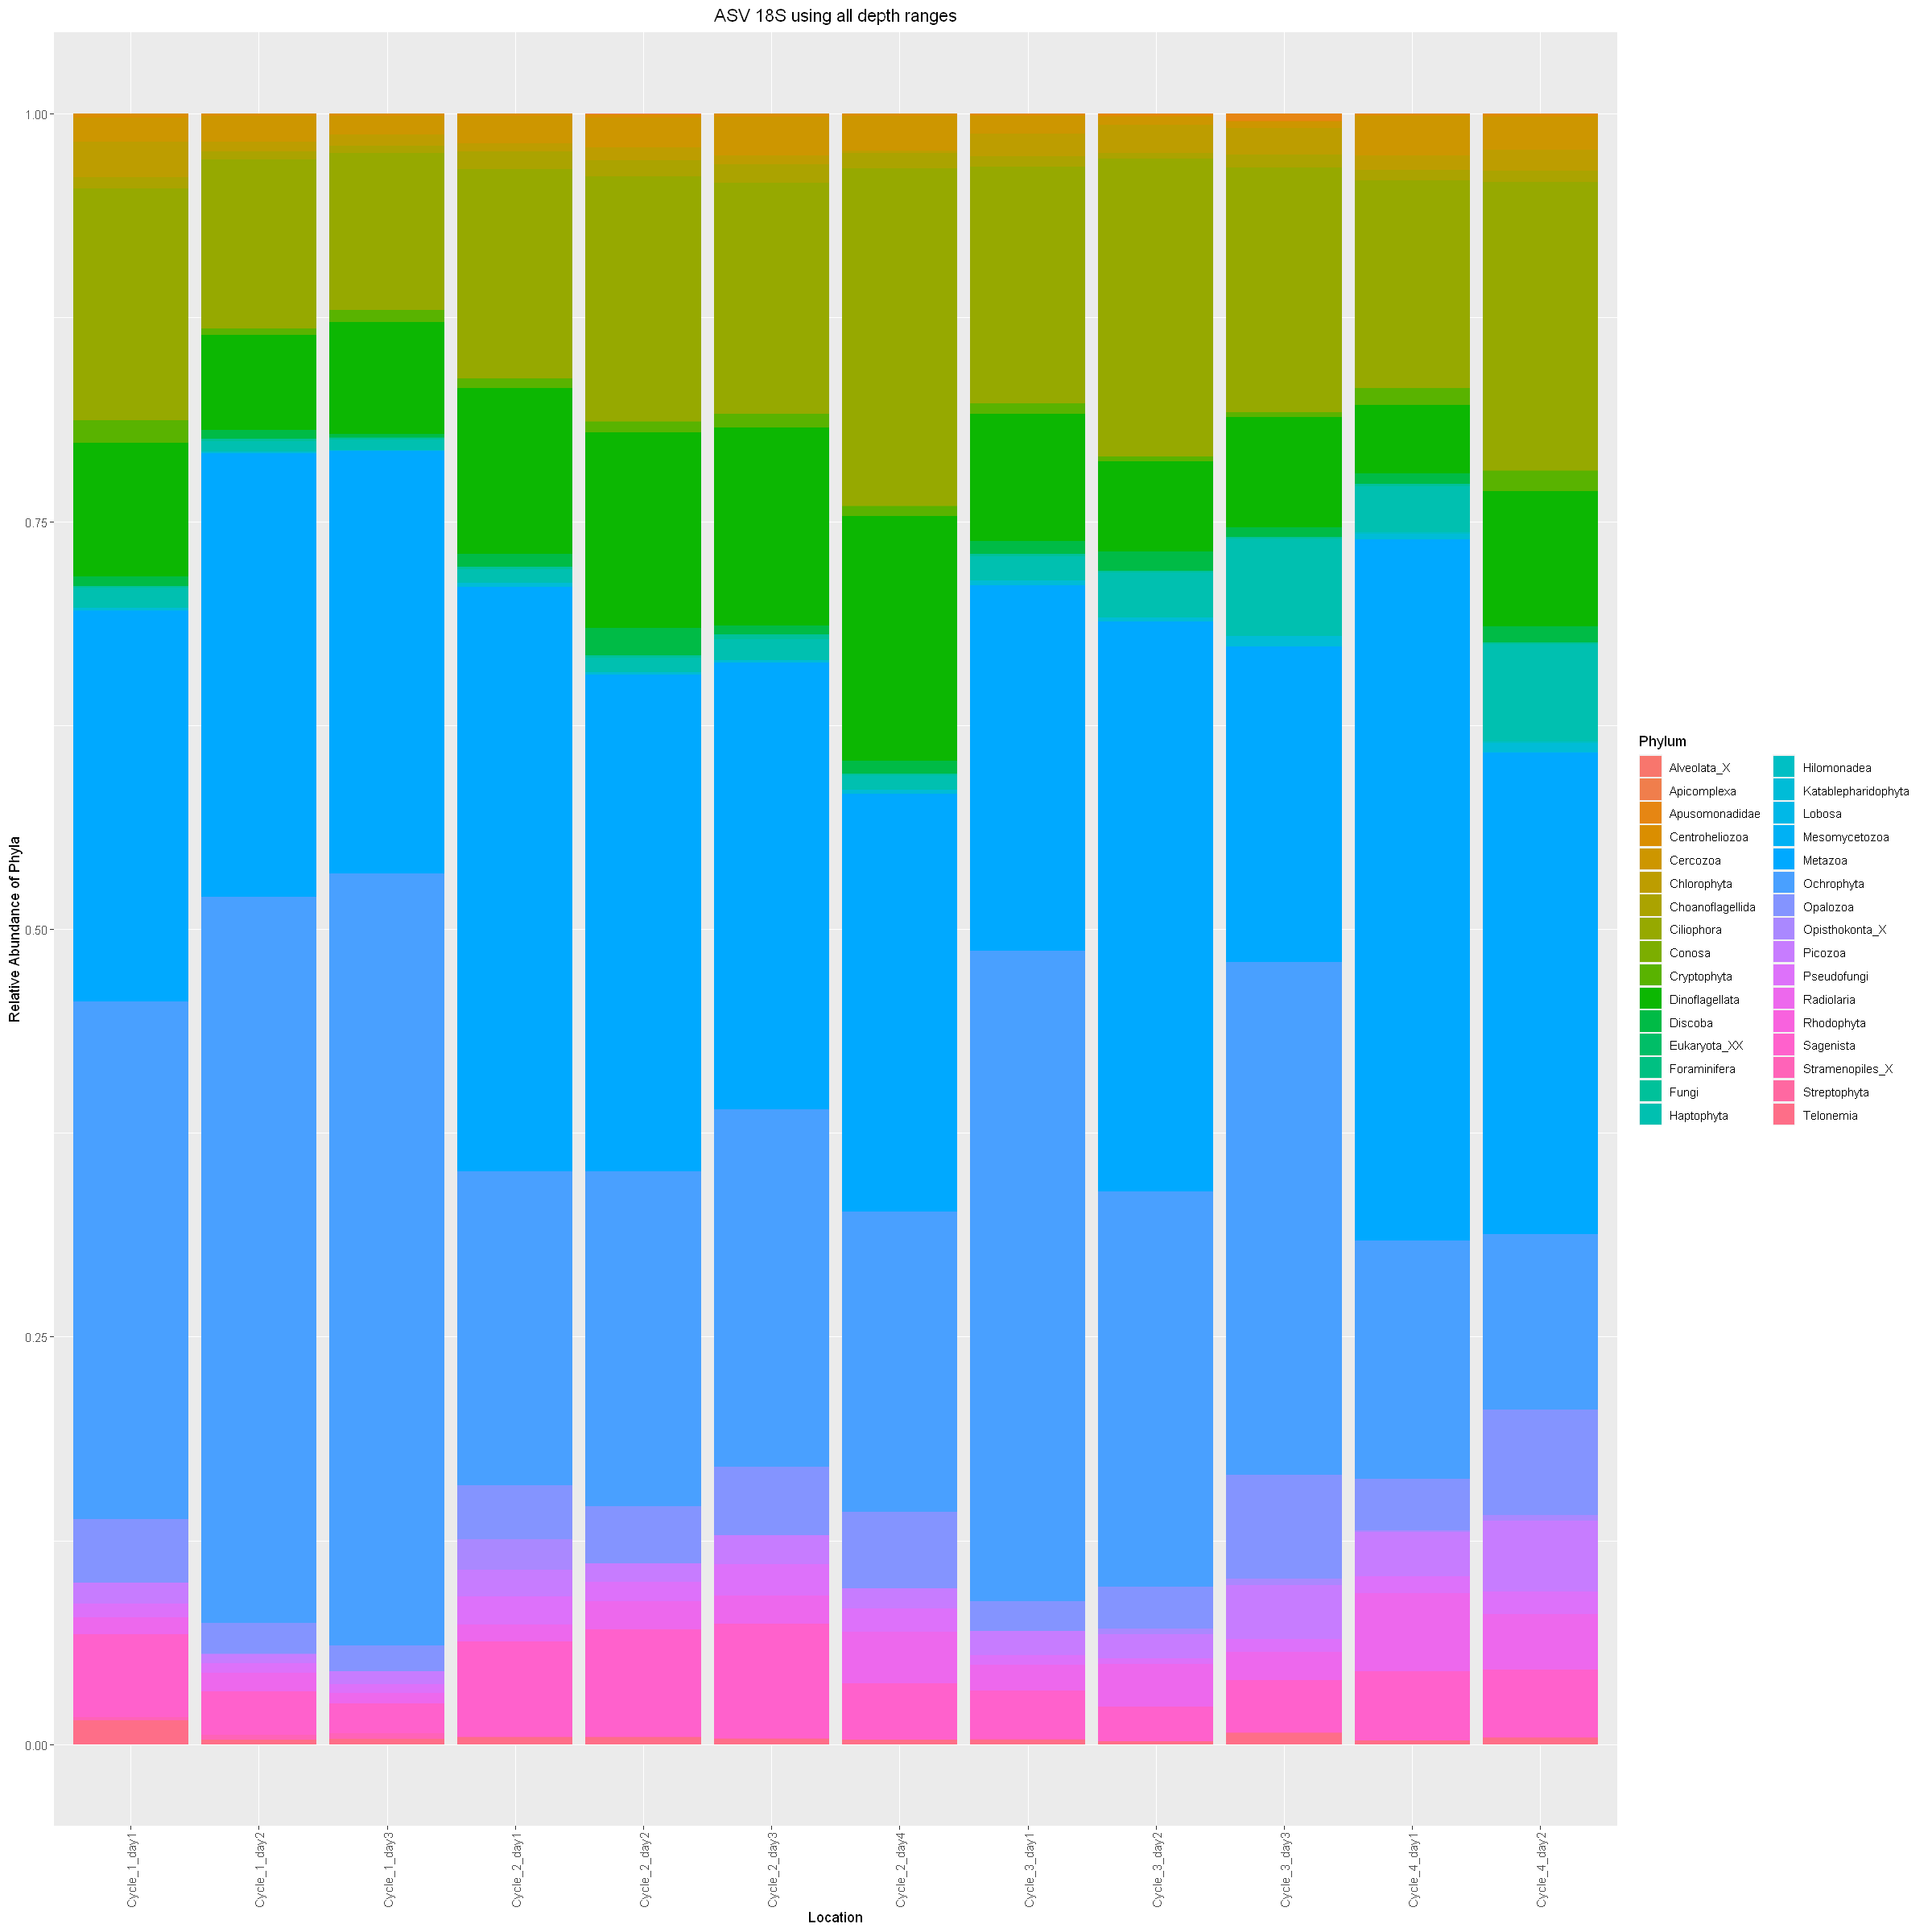

In [44]:
Stacked_plot <- Stacked_plot %>% filter(Group_name != 'NA_values')

stackPlot <- ggplot(Stacked_plot, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity")+ 
  xlab("Location") + 
  ylab("Relative Abundance of Phyla") + 
  labs(fill = "Phylum") + #CHANGE THE TAXONOMIC NAME here
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +   # setting the angle for the x label
  theme(plot.title = element_text(hjust = 0.5)) 

stackPlot + 
ggtitle(label="ASV 18S using all depth ranges") # Provide the title here

Since the colors in the plot above are hard to distinguish, a list of distint colors are generated using: I want hue https://medialab.github.io/iwanthue/

In [45]:
manual_colors <-c("#008333","#ff4985","#00631b","#763595","#4e7300","#c5abff","#ff9c3a",
                 "#006f12","#9554dc","#acd52d","#b22db4","#2ee277","#b90089","#82db6a",
                 "#ff45af","#01bd71","#f7255e","#00cdbd","#b2002b","#01d0ff","#9e2405",
                 "#01a7f5","#d3c400","#4248a5","#cc9700","#8b8eff","#738300","#ff82ea",
                 "#50d6f4","#ff5c56","#00a193","#991a6b","#a1d484","#7a3d6c","#a4d394",
                 "#793f64","#f2bd68","#694e7c","#b16400","#019ba0","#ff898b","#007b62",
                 "#ff9dd2","#405a1f","#a16b91","#7c6400","#acc28c","#665008","#c7cb85","#819a66")

Also, getting the plots for all 3 dataframes: Full, surface, deep:

## A. Stacked bar plot for samples of all depth:

In [46]:
Stacked_plot <- StackPlot_full %>% filter(Group_name != 'NA_values')

stackPlot <- ggplot(Stacked_plot, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  scale_fill_manual(values = manual_colors) +
  scale_y_continuous(labels = scales::label_percent(scale = 100, prefix = "", suffix = ""))+
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")) +
  guides(fill=guide_legend(ncol=2))

In [47]:
stackPlot <- stackPlot + 
    ggtitle(label="ASV 18S using all depth ranges") + #change the name here
    ylab("Relative Abundance of Phyla") + #change name
    labs(fill = "Phylum") #CHANGE THE TAXONOMIC NAME here

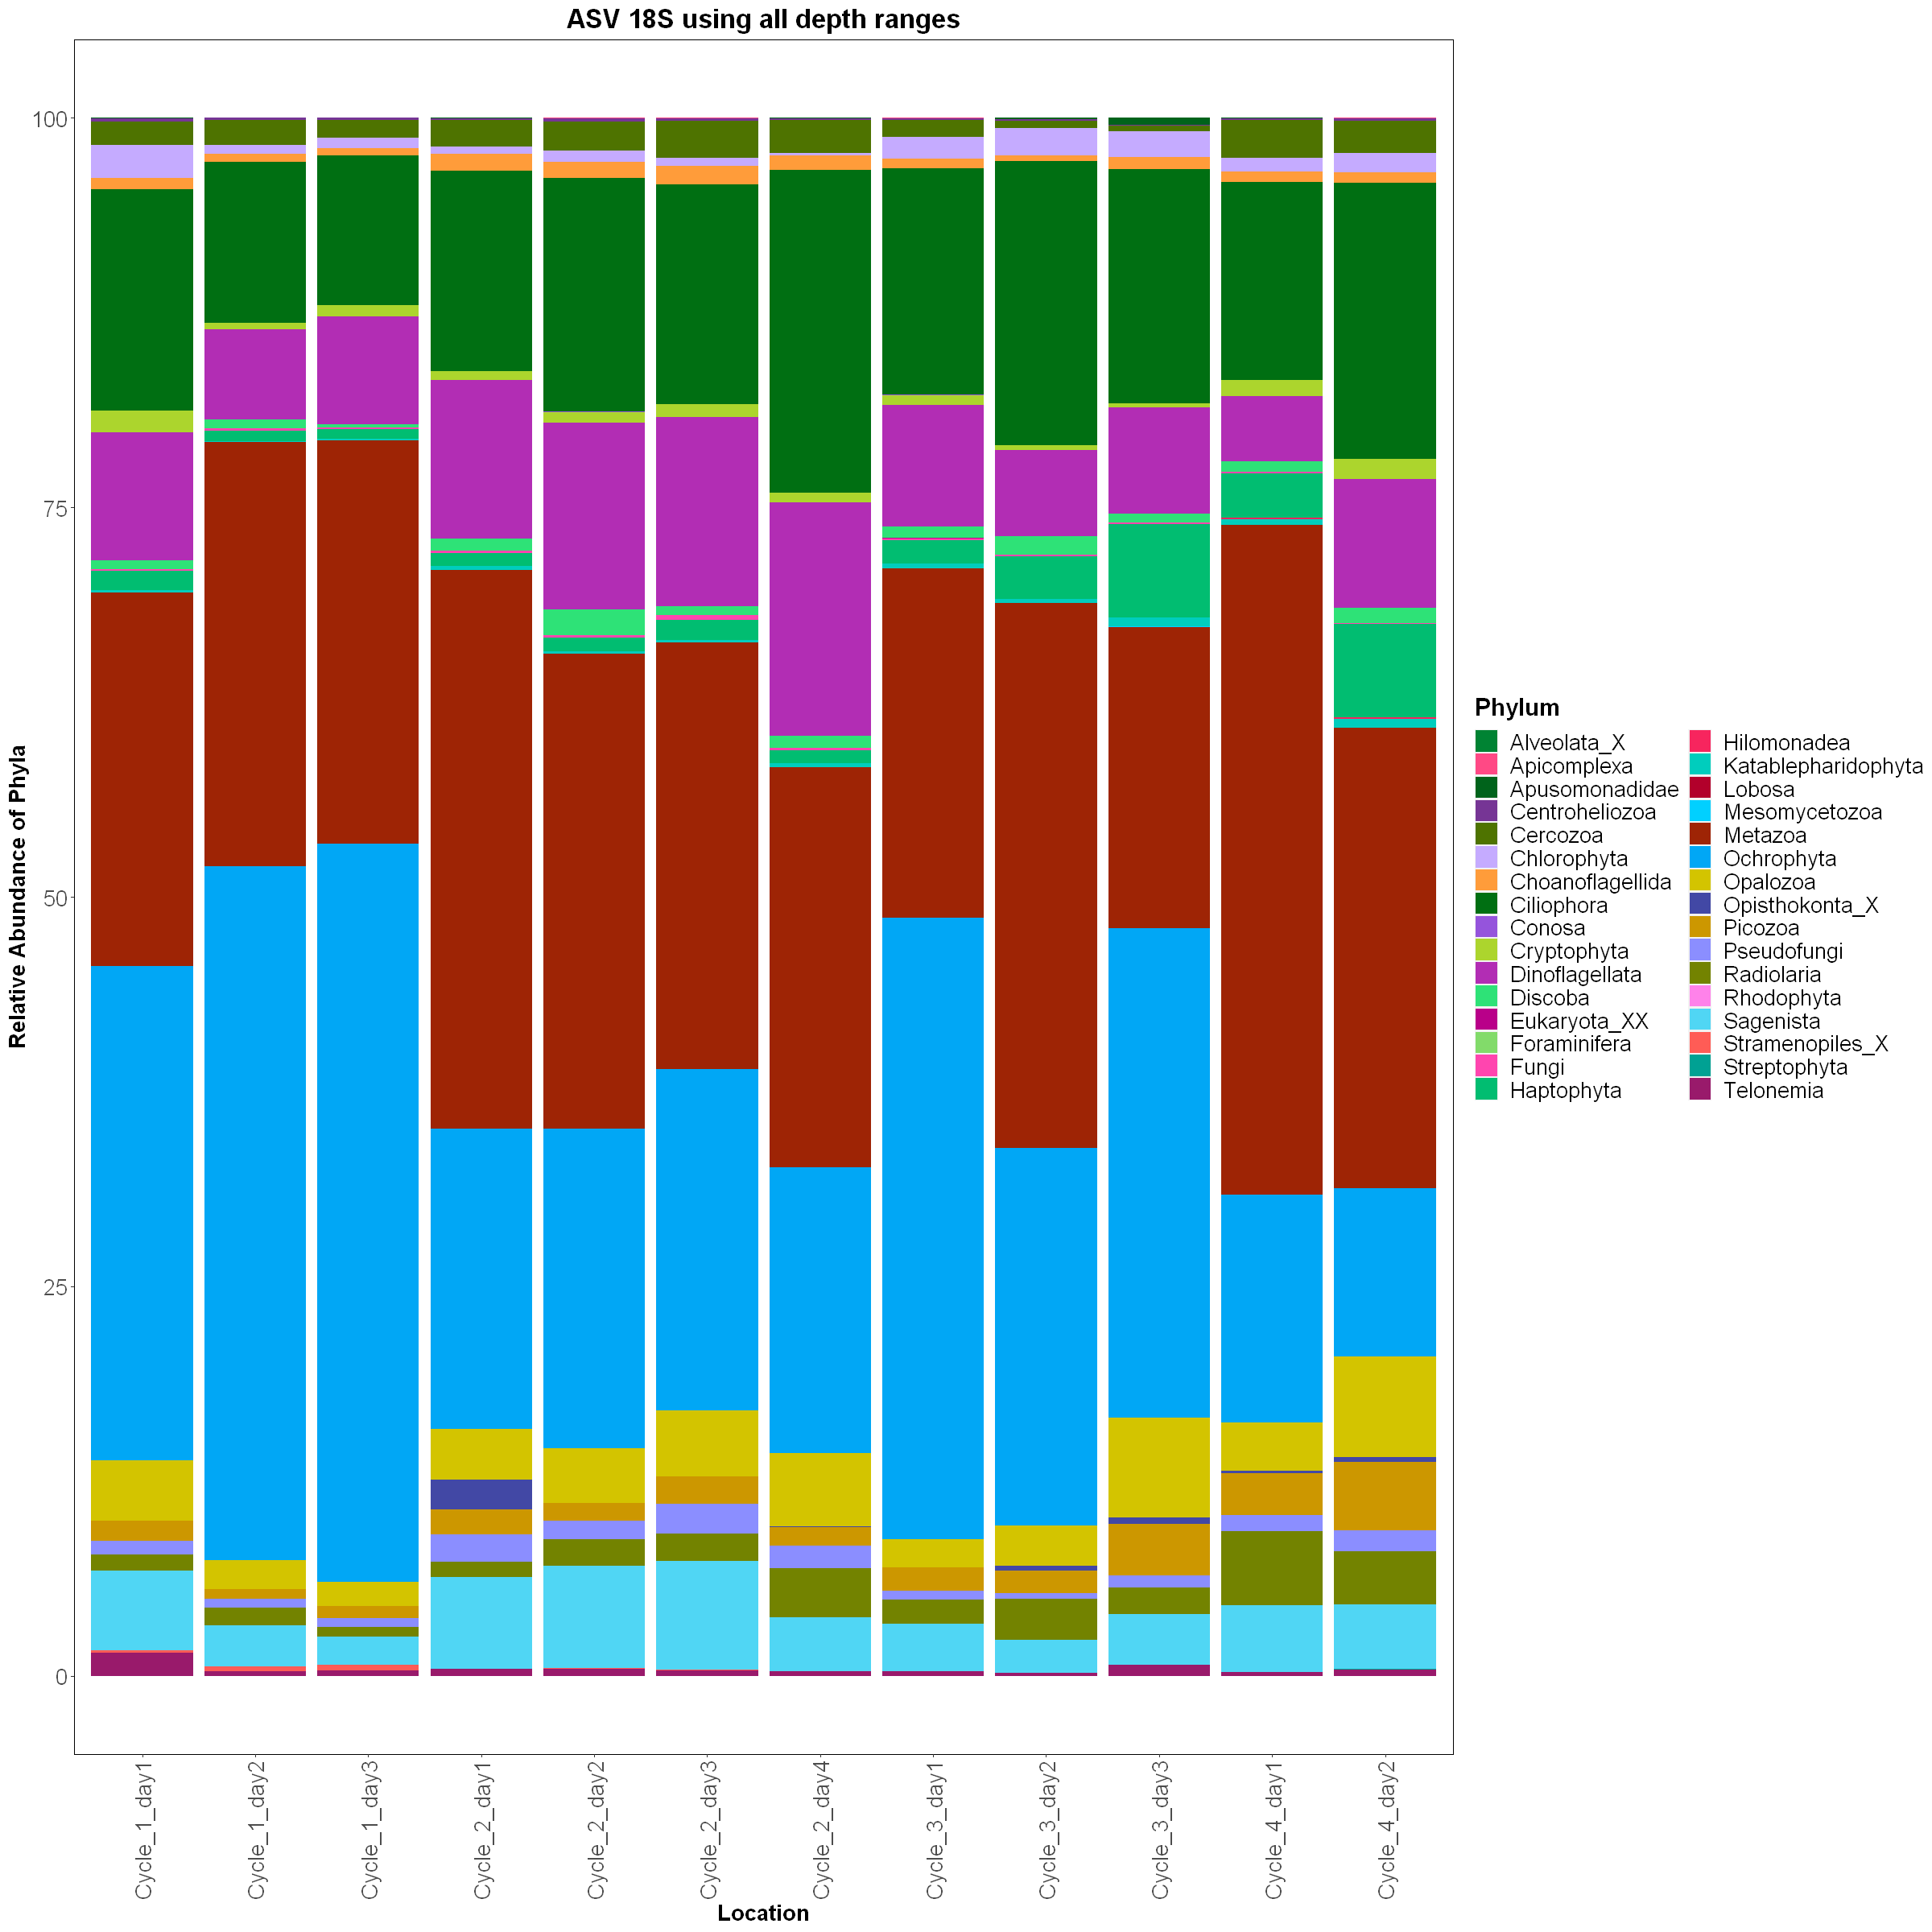

In [48]:
stackPlot # view the plot

In [49]:
ggsave("ASV18S_Phyla_fulldepth.svg",stackPlot, width=20, height=20) # save the plot

## B. Stacked bar plot for surface samples:

In [50]:
Stacked_surface <- StackPlot_surface %>% filter(Group_name != 'NA_values')

stackPlot_surface <- ggplot(Stacked_surface, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  scale_fill_manual(values = manual_colors) +
  scale_y_continuous(labels = scales::label_percent(scale = 100, prefix = "", suffix = ""))+
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")) +
  guides(fill=guide_legend(ncol=2))

<font color="red"> Change the name in the cell below:</font>

In [51]:
stackPlot_surface <- stackPlot_surface + 
    ggtitle(label="ASV 18S using surface samples") + #change the name here
    ylab("Relative Abundance of Phyla") + #cahnge name
    labs(fill = "Phylum") #CHANGE THE TAXONOMIC NAME here

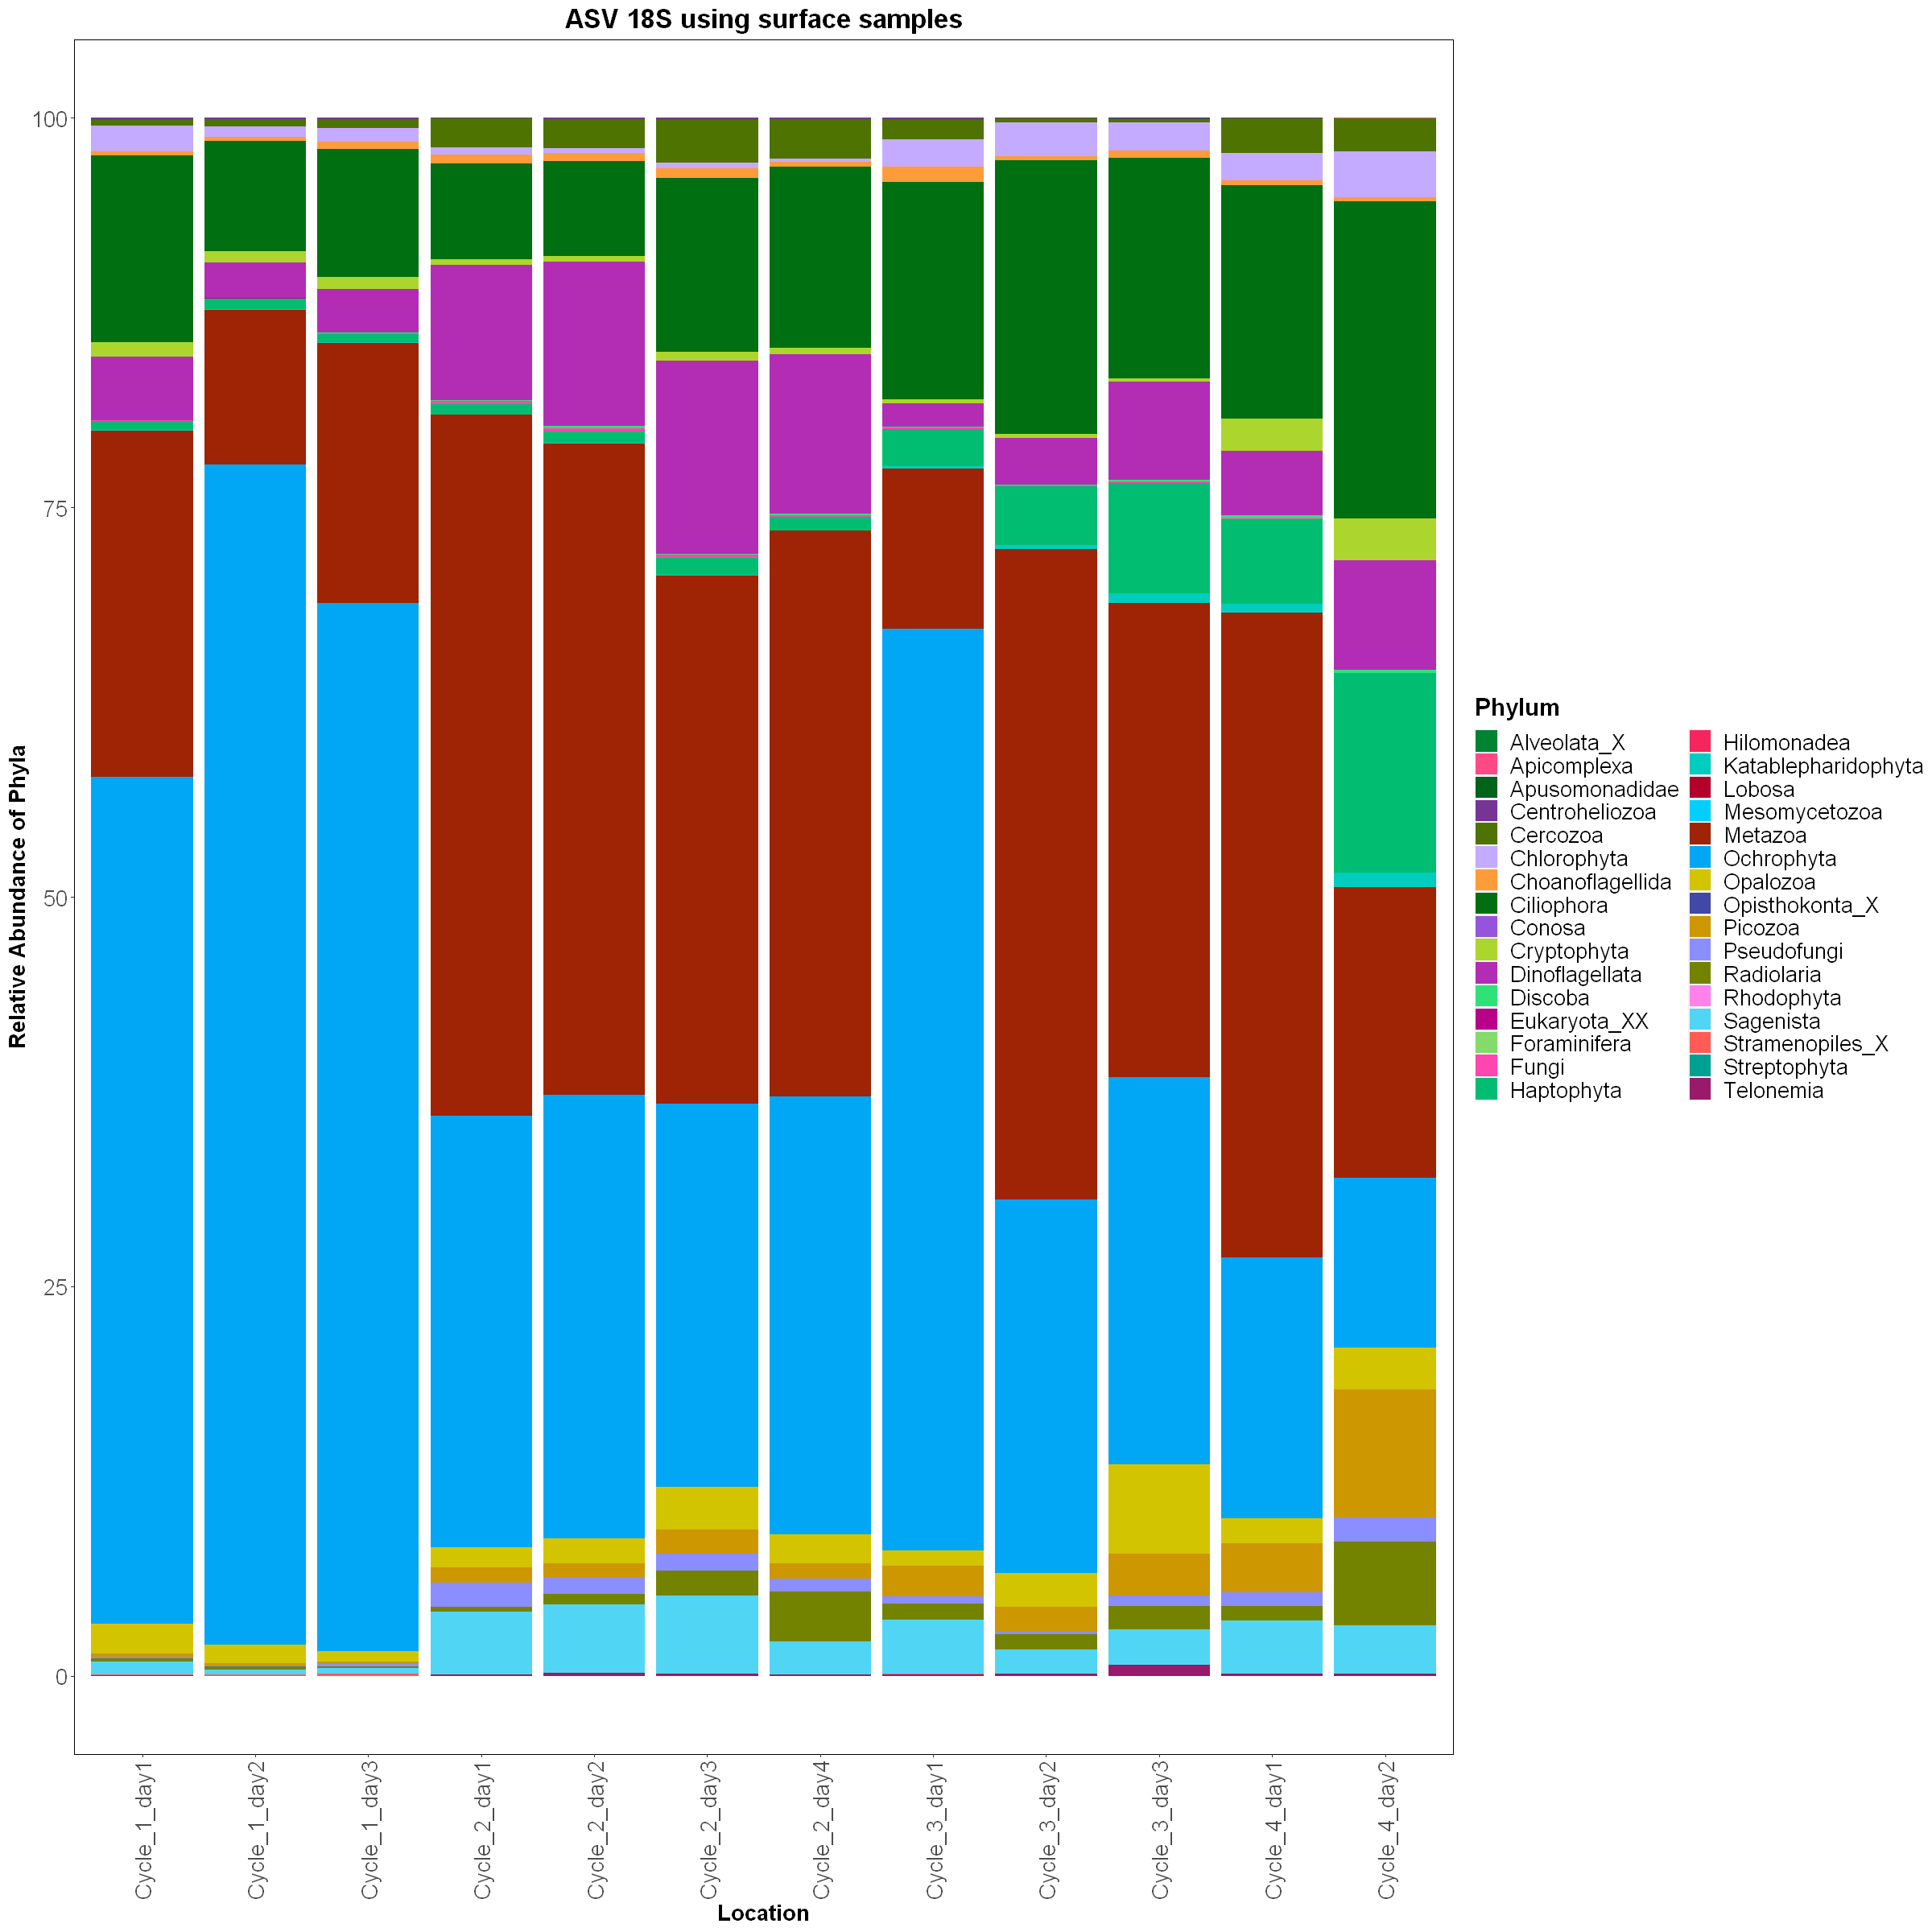

In [52]:
stackPlot_surface # view the plot

In [53]:
ggsave("ASV18S_Phyla_surface.svg",stackPlot_surface, width=20, height=20) # save the plot

## C. Stacked bar plot for deep samples:

In [54]:
Stacked_deep <- StackPlot_deep %>% filter(Group_name != 'NA_values')

stackPlot_deep <- ggplot(Stacked_deep, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  scale_fill_manual(values = manual_colors) +
  scale_y_continuous(labels = scales::label_percent(scale = 100, prefix = "", suffix = ""))+
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")) +
  guides(fill=guide_legend(ncol=2))

<font color="red"> Change the name in the cell below:</font>

In [55]:
stackPlot_deep <- stackPlot_deep + 
    ggtitle(label="ASV 18S using deep samples") + #change the name here
    ylab("Relative Abundance of Phyla") + #cahnge name
    labs(fill = "Phylum") #CHANGE THE TAXONOMIC NAME here

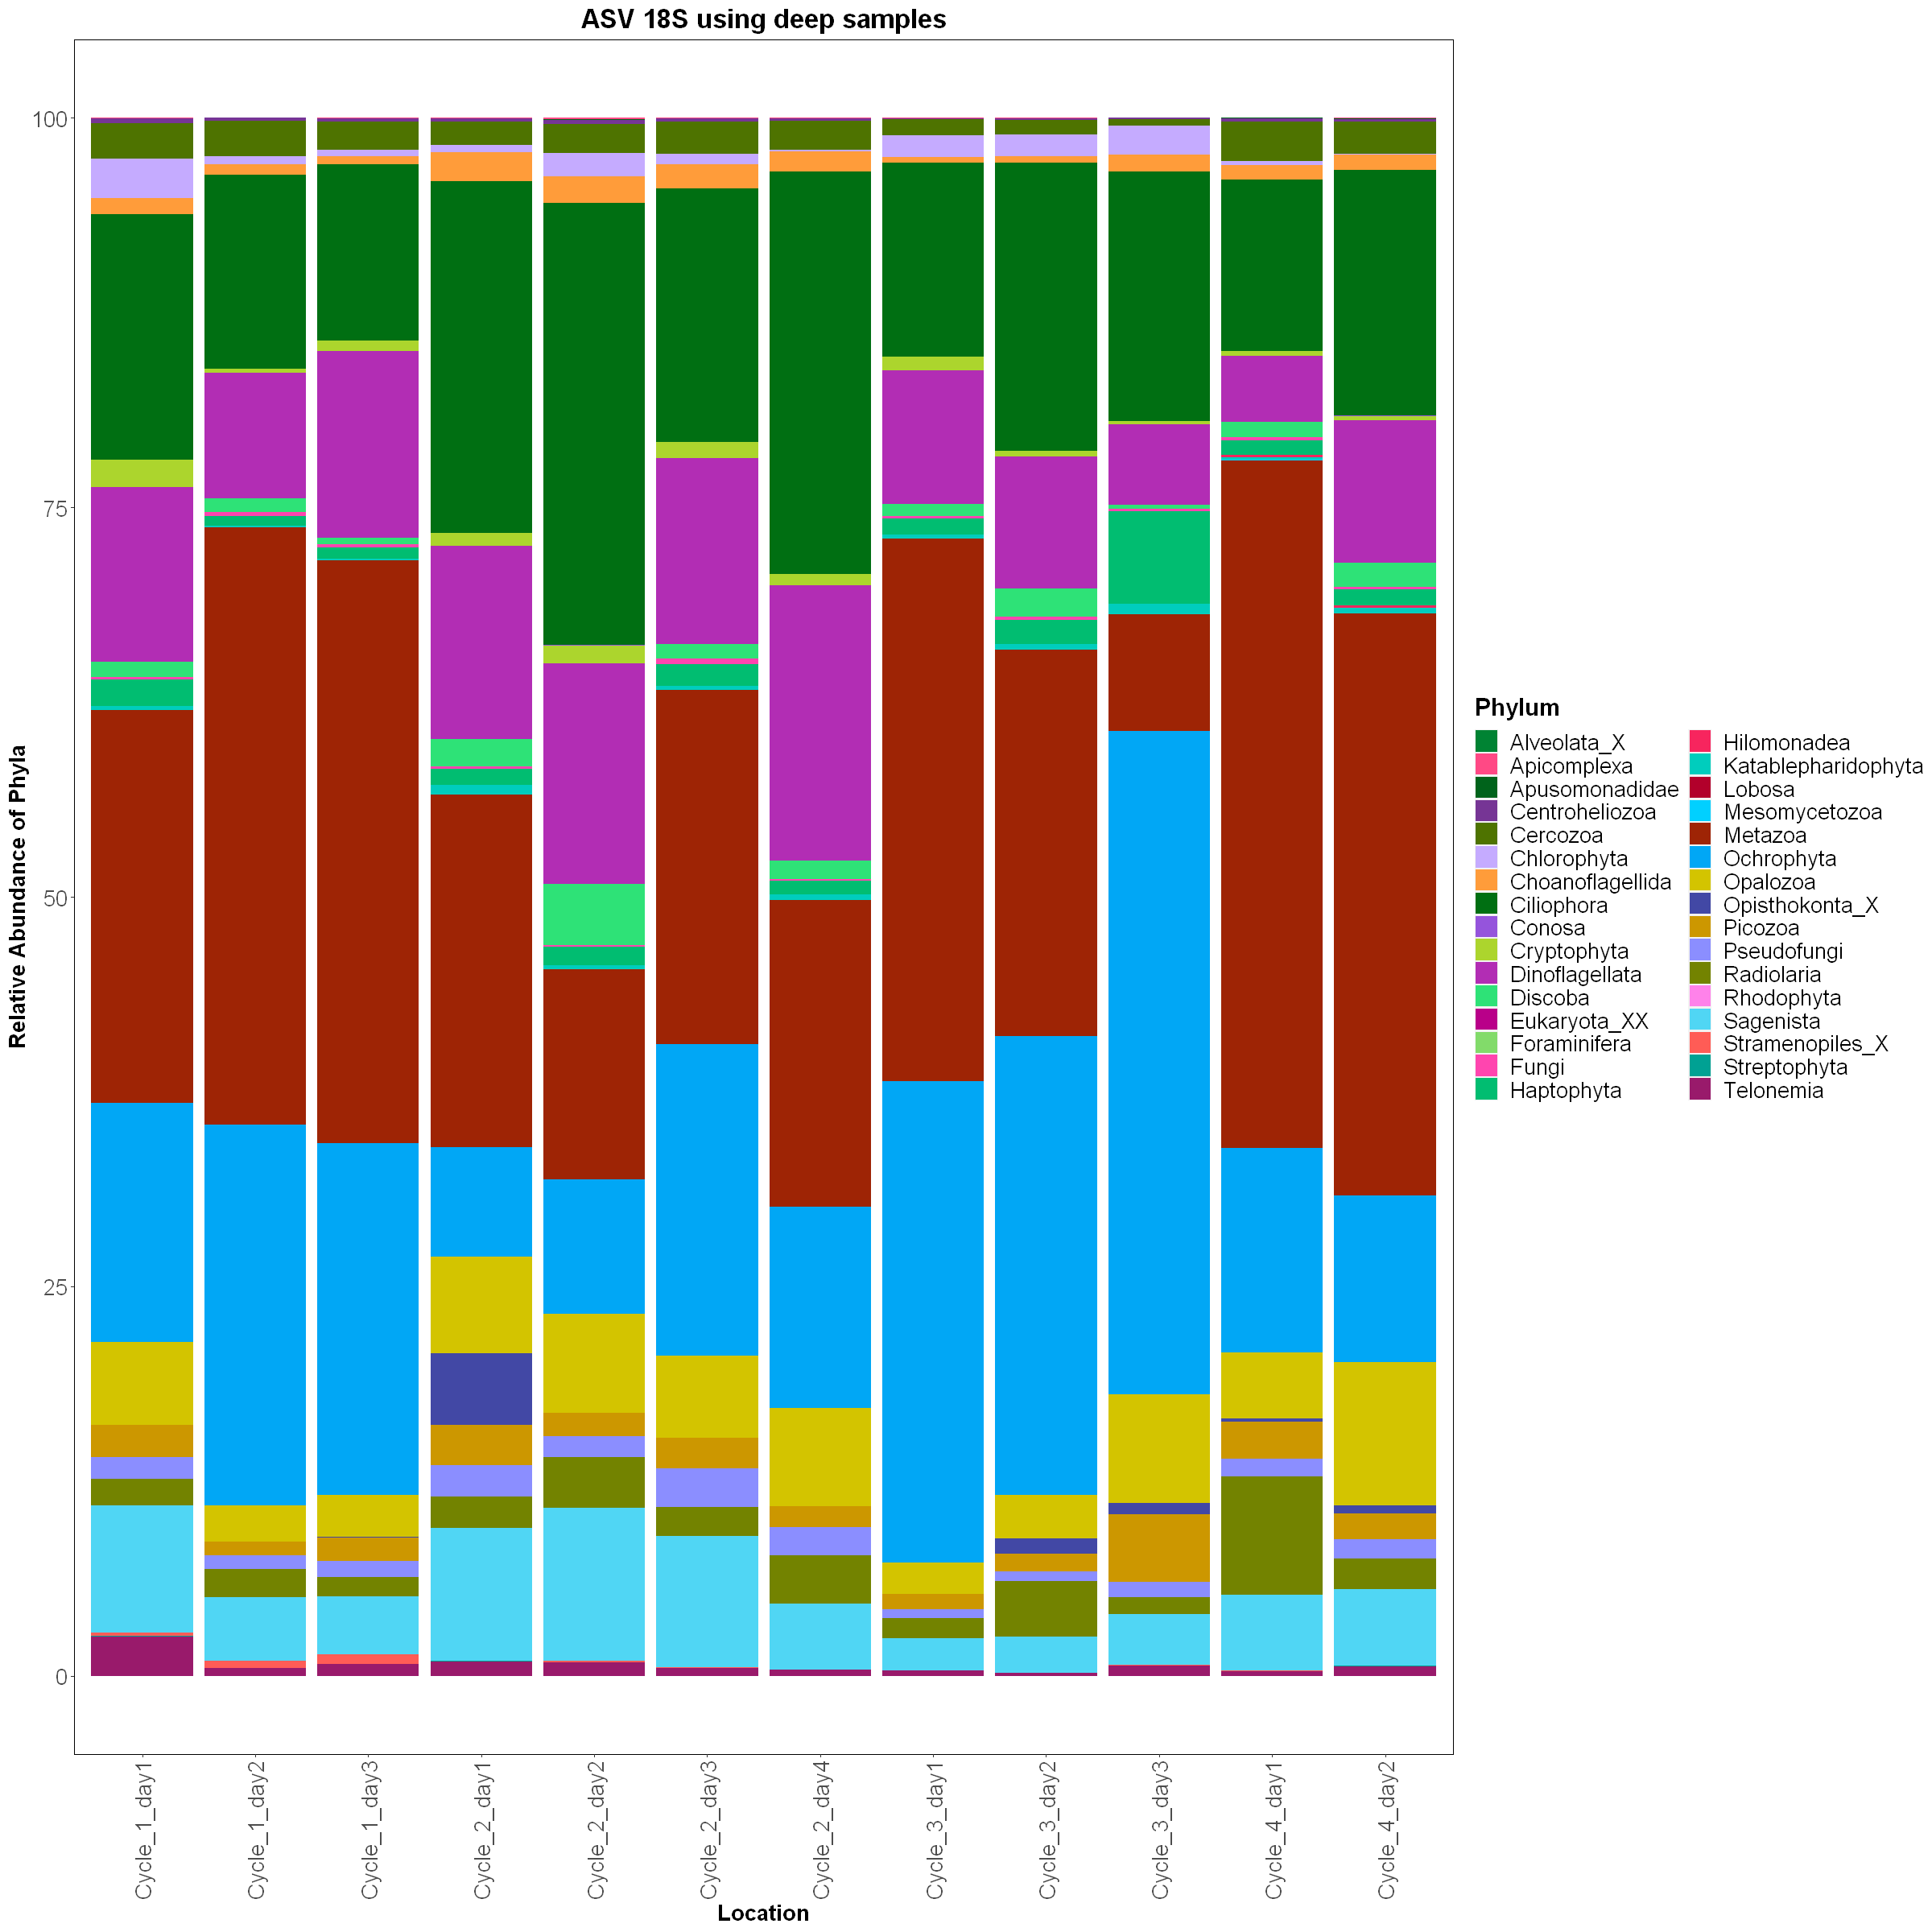

In [56]:
stackPlot_deep # view the plot

In [57]:
ggsave("ASV18S_Phyla_deep.svg",stackPlot_deep, width=20, height=20) # save the plot